# Data generation for volume inversion

This notebook describes how the training data, consisting of pairs $(\Lambda, V(r_0))$, is generated by module `volume_inversion_data`.

# Delta like source

As $a$ does not depend on time, the map $\Lambda$ is translation invariant in time, that is,

$$
\Lambda h(t - s) = \Lambda h_s(t)
$$

where $h_s(t) = h(t - s)$. Hence the whole $\Lambda$ is determined by $\Lambda \delta$ where $\delta$ is the delta distribution at $t=0$. 
Motivated by this, we compute $\Lambda h_0$, with $h_0$ an approximation of $\delta$. The function $h_0$ is implemented by `bump` function of `volume_inversion_data` module. To generate an approximation of the whole $\Lambda$, we translate $\Lambda h_0$ in time, see the function `time_translate`. These time translations are not saved, they are generated as the data is loaded using `load_data`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import volume_inversion_data as data

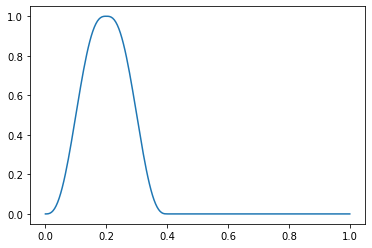

In [2]:
xs_plot = np.linspace(0,1, 200)
plt.plot(xs_plot, data.bump(xs_plot));

Let's see how the corresponding $\Lambda h_0$ looks like. Here $a = 1$. This is computed using `wave1d` module.

126


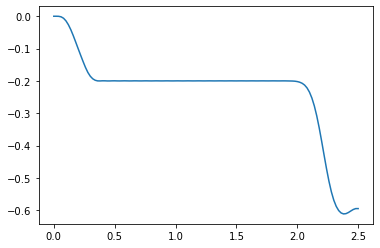

In [10]:
Lambda_h, ts = data.compute_Lambda_h(lambda x: 1)
print(np.size(Lambda_h))
plt.plot(ts, Lambda_h);

# Volumes

Module `volume_inversion_data` generates training data as follows:

1. Generate a random piecewise constant function $c$
2. Compute the volume $V(r_0)$, with $r_0 = 1/2$, corresponding to $c$
3. Compute $\Lambda h_0$ for $a = c^2$ using `wave1d` 
4. Compute $\Lambda$ using time translations of $\Lambda h_0$ 

The training data is given by the pairs $(X,y) = (\Lambda, V(r_0))$.

Let's inspect the implementation of this in a bit more detail.

Plot one randomly generated $c$.

[0.68361596 1.06817572 1.28630836 1.00768081 1.31453688]


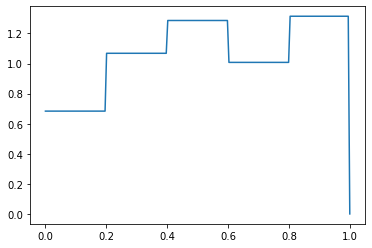

In [4]:
num_cells = 5
cells = np.linspace(0, 1, num_cells+1)

c_vals = data.generate_c_vals(num_cells)
c = data.c(cells, c_vals)

print(c_vals)
plt.plot(xs_plot, c(xs_plot));

Plot the corresponding $\tau$ and $\chi$. As these are inverses of each other, the plot should be symmetric with respect to the line $y = x$.

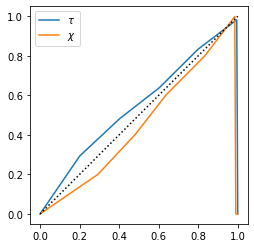

In [5]:
tau = data.tau(cells, c_vals)
chi = data.chi(cells, c_vals)
plt.plot(xs_plot, tau(xs_plot), label=r'$\tau$')
plt.plot(xs_plot, chi(xs_plot), label=r'$\chi$')
plt.plot(xs_plot, xs_plot, 'k:')
plt.gca().set_aspect(1)
plt.legend();

Plot the volume $V(r)$ as a function of $r$.

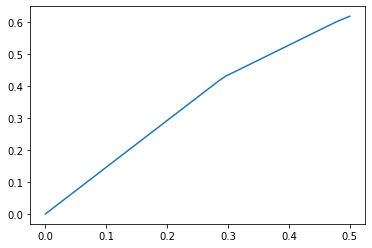

In [6]:
rs_plot = np.linspace(0, 0.5)
V = data.V(cells, c_vals)
plt.plot(rs_plot, V(rs_plot));

# Verification

Let's verify that $\chi(\tau(x)) = x$ and that the relation

$$
c(\chi(r)) = \frac{1}{\partial_r V(r)}
$$

holds.

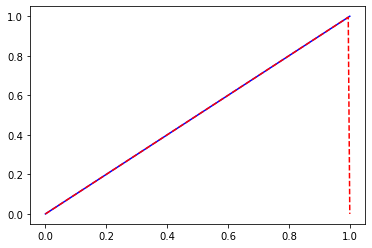

In [7]:
plt.plot(xs_plot, xs_plot, 'b')
plt.plot(xs_plot, chi(tau(xs_plot)), 'r--');

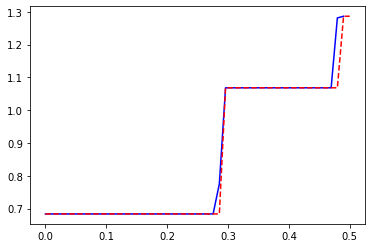

In [8]:
dr = rs_plot[1] - rs_plot[0]
# Derivative using finite differences
dV = (V(rs_plot[1:]) - V(rs_plot[:-1])) / dr 
plt.plot(rs_plot[:-1], 1/dV, 'b')
plt.plot(rs_plot, c(chi(rs_plot)), 'r--');

In [16]:
xs, ys = data.generate_data(1)
x = xs[0]
X = data.time_translate(x)
np.shape(X)

(126, 126)